In [20]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageio import imread
import glob
from IPython.display import clear_output
import os  # 匯入os模組
import sys # 匯入sys模組
import pyodm # 匯入pyodm模組
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score


In [21]:
labels = []
features0=[]
with open('train.txt', 'r') as file:
    for line in file:
        image_file_name, label = line.strip().split(' ')
        image = Image.open(image_file_name)
        image_data_0 = np.array(image)
        
        labels_0=labels.append(label)
        
        image_data_0=cv2.cvtColor(image_data_0, cv2.COLOR_RGB2BGR)
        resized_image= cv2.resize(image_data_0, (32, 32))
        features0.append(resized_image)
features0 = np.array(features0)
labels_0=np.array(labels)
print(features0.shape)
features0 = features0.astype("float32") / 255.0

# 轉換為灰階圖片
gray_data_0 = np.mean(features0, axis=3, keepdims=True)
print(gray_data_0.shape)

labels = []
features1=[]
with open('test.txt', 'r') as file:
    for line in file:
        image_file_name, label = line.strip().split(' ')
        image = Image.open(image_file_name)
        image_data_1 = np.array(image)
        
        labels_1=labels.append(label)
        
        image_data_1=cv2.cvtColor(image_data_1, cv2.COLOR_RGB2BGR)
        resized_image= cv2.resize(image_data_1, (32, 32))
        features1.append(resized_image)
features1 = np.array(features1)
labels_1=np.array(labels)
print(features1.shape)
features1 = features1.astype("float32") / 255.0

# 轉換為灰階圖片
gray_data_1 = np.mean(features1, axis=3, keepdims=True)
print(gray_data_1.shape)

labels = []
features2=[]
with open('val.txt', 'r') as file:
    for line in file:
        image_file_name, label = line.strip().split(' ')
        image = Image.open(image_file_name)
        image_data_2 = np.array(image)
        
        labels_2=labels.append(label)
        
        image_data_2=cv2.cvtColor(image_data_2, cv2.COLOR_RGB2BGR)
        resized_image= cv2.resize(image_data_2, (32, 32))
        features2.append(resized_image)
features2 = np.array(features2)
labels_2=np.array(labels)
print(features2.shape)
features2 = features2.astype("float32") / 255.0

# 轉換為灰階圖片
gray_data_2 = np.mean(features2, axis=3, keepdims=True)
print(gray_data_2.shape)

(63325, 32, 32, 3)
(63325, 32, 32, 1)
(450, 32, 32, 3)
(450, 32, 32, 1)
(450, 32, 32, 3)
(450, 32, 32, 1)


In [22]:
import tensorflow as tf
from tensorflow.keras import layers
import time
from keras_flops import get_flops
start_time = time.time()
# 定义LeNet-5模型
def LeNet5(input_shape):
    model = tf.keras.Sequential()

    # 第一层卷积层
    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # 第二层卷积层
    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # 将多维输入展平为一维
    model.add(layers.Flatten())

    # 第一层全连接层
    model.add(layers.Dense(units=120, activation='relu'))

    # 第二层全连接层
    model.add(layers.Dense(units=84, activation='relu'))

    # 输出层
    model.add(layers.Dense(units=1, activation='sigmoid'))

    return model

# 创建LeNet-5模型
input_shape = (32, 32, 1)
model = LeNet5(input_shape)

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 打印模型概要信息
model.summary()
(x_train, y_train), (x_val, y_val) = (gray_data_0,labels_0),(gray_data_2,labels_2)
x_test, y_test=gray_data_1,labels_1
y_train = y_train.astype(np.float32) 
y_val=y_val.astype(np.float32)
y_test=y_test.astype(np.float32)
# 训练模型
model.fit(x_train,y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))
end_time = time.time()
execution_time = end_time - start_time
print("代码执行时间：", execution_time, "秒")

flops = get_flops(model, batch_size=32)
print("模型的FLOPs：", flops)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 400)               0         
                                                                 
 dense_33 (Dense)            (None, 120)             

In [24]:
# 使用验证集进行预测
val_predictions = model.predict(x_val)
val_predicted_labels = tf.argmax(val_predictions, axis=1)

# 将标签转换为numpy数组
val_predicted_labels = val_predicted_labels.numpy()

# 计算top-1准确率
correct = 0
total = len(y_val)
for pred, true in zip(val_predicted_labels, y_val):
    if pred == true:
        correct += 1
top1_acc = correct / total

# 打印top-1准确率
print("Top-1 Accuracy on Validation Set:", top1_acc)


15/15 [==============================] - 0s 2ms/step
Top-1 Accuracy on Validation Set: 0.02


Epoch 1/10
1979/1979 [==============================] - 10s 5ms/step - loss: -835150068515340288.0000 - accuracy: 0.0202 - val_loss: -988459166664228864.0000 - val_accuracy: 0.0200
Epoch 2/10
1979/1979 [==============================] - 10s 5ms/step - loss: -1204841543182057472.0000 - accuracy: 0.0202 - val_loss: -1405900575899385856.0000 - val_accuracy: 0.0200
Epoch 3/10
1979/1979 [==============================] - 10s 5ms/step - loss: -1689317977339461632.0000 - accuracy: 0.0202 - val_loss: -1947728086317400064.0000 - val_accuracy: 0.0200
Epoch 4/10
1979/1979 [==============================] - 12s 6ms/step - loss: -2313557732549984256.0000 - accuracy: 0.0202 - val_loss: -2640614613057536000.0000 - val_accuracy: 0.0200
Epoch 5/10
1979/1979 [==============================] - 10s 5ms/step - loss: -3103245400438472704.0000 - accuracy: 0.0202 - val_loss: -3509846999413293056.0000 - val_accuracy: 0.0200
Epoch 6/10
1979/1979 [==============================] - 13s 7ms/step - loss: -408958264

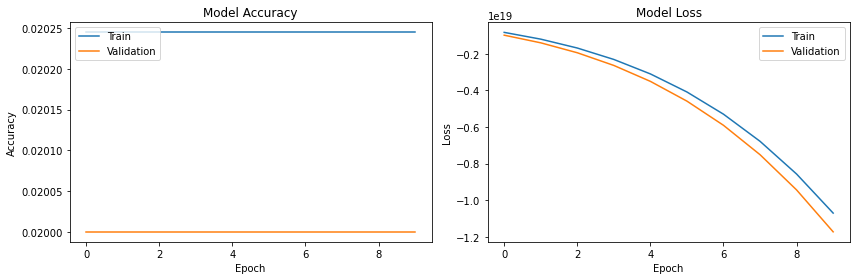

In [25]:
import matplotlib.pyplot as plt

# 训练模型
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

# 绘制训练过程中准确率和损失值的变化曲线
plt.figure(figsize=(12, 4))

# 绘制准确率变化曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# 绘制损失值变化曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# 展示图形
plt.tight_layout()
plt.show()

In [18]:
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("accuracy score:{:.2f}".format(acc))

15/15 [==============================] - 0s 2ms/step
accuracy score:0.02


In [5]:
import tensorflow as tf
from tensorflow.keras import layers
import time
import numpy as np

# 定义LeNet-5模型
def LeNet5(input_shape):
    model = tf.keras.Sequential()
    
    # 第一层卷积层
    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # 第二层卷积层
    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # 将多维输入展平为一维
    model.add(layers.Flatten())

    # 第一层全连接层
    model.add(layers.Dense(units=120, activation='relu'))

    # 第二层全连接层
    model.add(layers.Dense(units=84, activation='relu'))

    # 输出层
    model.add(layers.Dense(units=1, activation='sigmoid'))

    return model

# 创建LeNet-5模型
input_shape = (32, 32, 1)
model = LeNet5(input_shape)

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 打印模型概要信息
model.summary()

# Generate sample data (replace with your own data)
(x_train, y_train), (x_val, y_val) = (gray_data_0,labels_0),(gray_data_2,labels_2)
x_test, y_test=gray_data_1,labels_1

y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)
y_test = y_test.astype(np.float32)

# Training with dynamic graph
start_time = time.time()
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))
end_time = time.time()
dynamic_execution_time = end_time - start_time

# Inference with dynamic graph
start_time = time.time()
model.predict(x_test)
end_time = time.time()
dynamic_inference_time = end_time - start_time

# Print the results
print("Dynamic Graph - Training Time: {:.2f} seconds".format(dynamic_execution_time))
print("Dynamic Graph - Inference Time: {:.2f} seconds".format(dynamic_inference_time))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [15]:
import tensorflow as tf
from tensorflow.keras import layers
import time
import numpy as np

# 定义LeNet-5模型
def LeNet5(input_shape):
    model = tf.keras.Sequential()

    # 第一层卷积层
    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # 第二层卷积层
    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # 将多维输入展平为一维
    model.add(layers.Flatten())

    # 第一层全连接层
    model.add(layers.Dense(units=120, activation='relu'))

    # 第二层全连接层
    model.add(layers.Dense(units=84, activation='relu'))

    # 输出层
    model.add(layers.Dense(units=1, activation='sigmoid'))

    return model

# 创建LeNet-5模型
input_shape = (32, 32, 1)
model = LeNet5(input_shape)
optimizer = tf.keras.optimizers.Adam()
# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 打印模型概要信息
model.summary()
(x_train, y_train), (x_val, y_val) = (gray_data_0,labels_0),(gray_data_2,labels_2)
x_test, y_test=gray_data_1,labels_1
y_train = np.expand_dims(y_train, axis=1)
y_val = np.expand_dims(y_val, axis=1)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)
y_test = y_test.astype(np.float32)

# 创建静态图版本的模型

def static_model_train(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = tf.keras.losses.binary_crossentropy(y, logits, from_logits=True)
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss_value

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

def static_model_predict(x):
    return model(x, training=False)


# 训练静态图模型
start_time = time.time()
for epoch in range(10):
    optimizer.build(model.trainable_variables)  
    for batch in train_dataset:
        loss = static_model_train(batch[0], batch[1])
end_time = time.time()
static_execution_time = end_time - start_time

# 推断静态图模型
start_time = time.time()
predictions = static_model_predict(x_test)
end_time = time.time()
static_inference_time = end_time - start_time
print("static_execution_time: {:.2f} seconds".format(static_execution_time))
print("static_inference_time:{:.2f} seconds".format(static_inference_time))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 400)               0         
                                                                 
 dense_30 (Dense)            (None, 120)             